# polynomial interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## the base function

In [2]:
def f(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + 25 * x ** 2)

## approximating some weird func

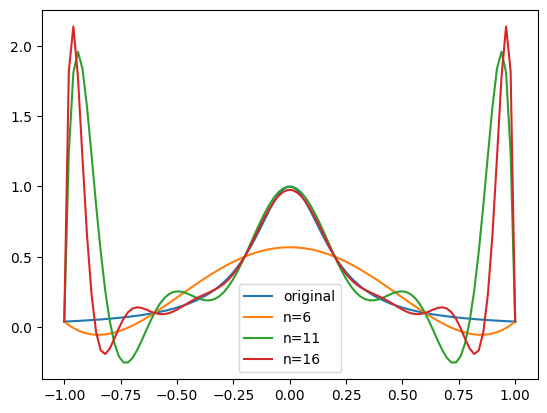

In [3]:
t = np.linspace(-1, 1, 100)
plt.plot(t, f(t), label="original")

for n in [6, 11, 16]:
    t = np.linspace(-1, 1, n)
    y = f(t)
    t_exp = np.vstack([t ** i for i in range(n)]).T
    coeffs = np.linalg.solve(t_exp, y)

    # surely when we plot it we want a higher resolution
    plot_t = np.linspace(-1, 1, 100)
    plot_t_exp = np.vstack([plot_t ** i for i in range(n)]).T
    plot_y = plot_t_exp @ coeffs
    plt.plot(plot_t, plot_y, label=f"n={n}")

plt.legend()

As we can see, while higher degree polynomials match hump in the middle better,
they also have more volatile behavior towards the end.

## with chebyshev points

yeah this is basically the exact same code as before

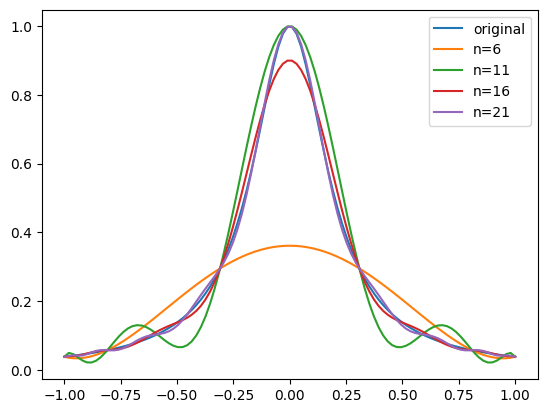

In [4]:
t = np.linspace(-1, 1, 100)
plt.plot(t, f(t), label="original")

for n in [6, 11, 16, 21]:
    t = np.cos(np.arange(n) * np.pi / (n - 1))  # the only difference is this HAHA
    y = f(t)
    t_exp = np.vstack([t ** i for i in range(n)]).T
    coeffs = np.linalg.solve(t_exp, y)

    plot_t = np.linspace(-1, 1, 100)
    plot_t_exp = np.vstack([plot_t ** i for i in range(n)]).T
    plot_y = plot_t_exp @ coeffs
    plt.plot(plot_t, plot_y, label=f"n={n}")

plt.legend()

Here, not only do higher degree polynomials match the hump better,
they also have better behavior at the endpoints.